# MSc. DA  - CA2

JOANNE O'SHAUGHNESSY, sba22202 <br>

# Section 1: Loading of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
%matplotlib inline
import seaborn as sns
sns.set()

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

Exploratory Data Analysis is used to analyse datasets and outline the main characteristics of the data. It helps in understanding the patterns within the data, identify evident errors and find correlation between features. Conducting EDA is one of the first steps we do with any dataset we work with in order to explore the data as it enables us to acknowledge what kind of data we are dealing with by checking the shape and size of the data, identifying missing values, unique values and others.

In order to conduct EDA first step needed is to import the required libraries:

Pandas is used to clean the data, manipulate into tables and process it. It handles data load by reading from various sources;
Seaborn library is used for data visualisation;
Matplot is also used for data visualisation;
%matplotlib inline is used to format the visualisations;
Numpy is used for mathematical operations.

By importing the libraries with a short name allows us to save typing the full name of the library every time we need to call it in a function. I will supress the warning messages aslo.

# Section 2: Dairy DataSets - Data Prep

By running the code below the data from the dataset is uploaded into the dataframe using Pandas Library. A dataframe object is created transferring semi structured data (in this case a csv file) into a structured type of data.

pd.read_csv works for any data file that is a csv type using Pandas library by giving an address where the data is.

Loading/reading CSV file with Milk Sales Ireland in litres Jan 1980 - Dec 2021 (source = gov.ie)

In [2]:
df = pd.read_csv('AKM02.20230103212036.csv')

To check how many columns and observations are in this dataset, the .shape function is used. The first number shows the number of rows or observations and the second number one shows the total number of columns within the dataset. As shown below, the dataset has 2520 observations and 8 columns.

In [3]:
df.shape

(2520, 8)

Now to read the data we need to call the dataframe created "df" and the function .head to see what is available within this dataset. Changing the argument in between brackets allows us to add the number of rows we want to see. If we do not add a number between brackets by default the function will show the top 5 rows within the dataset (all indexes start with zero).

In [4]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
0,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,1,All Milk,Million Litres,38.2
1,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,12,Whole Milk,Million Litres,38.2
2,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,13,Skimmed and Semi-skimmed milk,Million Litres,NaN
3,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,14,Skimmed Milk,Million Litres,NaN
4,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,15,Semi-skimmed milk,Million Litres,NaN


In order to display the bottom 5 rows of the dataset the function .tail is used. Like function .head by default .tail shows 5 entries in the dataset. It also can be changed by modifying the argument number between brackets.

In [5]:
df.tail()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
2515,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,1,All Milk,Million Litres,39.7
2516,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,12,Whole Milk,Million Litres,24.5
2517,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,13,Skimmed and Semi-skimmed milk,Million Litres,15.2
2518,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,14,Skimmed Milk,Million Litres,NaN
2519,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,15,Semi-skimmed milk,Million Litres,NaN


Using the .unique function to check how many different  types of milk in the dataset

In [6]:
df['Type of Milk'].unique()

array(['All Milk', 'Whole Milk', 'Skimmed and Semi-skimmed milk',
       'Skimmed Milk', 'Semi-skimmed milk'], dtype=object)

There are 5 different types, will drop all except “All milk” as differences in consumer preferences over the years, for example, preference for lower fat dairy products. The All milk is the total column so we will use this for our analysis.

In [7]:
df.drop(df[df['C02064V02491'] != 1].index, inplace = True)

As “All Milk” is coded 1 (column = “C02064V02491”), will remove anything in the dataframe that is not “All milk”, therefore leaving just All milk rows. Will run .head after to check the step completed correctly.

In [8]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
0,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,1,All Milk,Million Litres,38.2
5,AKM02,Milk Sales (Dairy) for Human Consumption,198002,01/02/1980,1,All Milk,Million Litres,36.6
10,AKM02,Milk Sales (Dairy) for Human Consumption,198003,01/03/1980,1,All Milk,Million Litres,38.4
15,AKM02,Milk Sales (Dairy) for Human Consumption,198004,01/04/1980,1,All Milk,Million Litres,36.8
20,AKM02,Milk Sales (Dairy) for Human Consumption,198005,01/05/1980,1,All Milk,Million Litres,38.8


Looks ok, will confirm with .unique also.

In [9]:
df['Type of Milk'].unique()

array(['All Milk'], dtype=object)

Confirmed, just one milk type left as we want.

In [10]:
df.shape

(504, 8)

Isolating for All milk leaves 504 rows and the same 8 columns.

In [11]:
df.isnull().values.any()

False

In [12]:
df.isnull().values.sum()

0

Using isnull function in two ways to check for missing values ad need to deal with missing values appropriately. Confirmed there are no missing values as indicated by false and 0 using any and sum options of the isnull function.

The date is an object we need to apply date time function and we will check the Dtype after to confirm this step was successful.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        504 non-null    object        
 1   STATISTIC Label  504 non-null    object        
 2   TLIST(M1)        504 non-null    int64         
 3   Date             504 non-null    datetime64[ns]
 4   C02064V02491     504 non-null    int64         
 5   Type of Milk     504 non-null    object        
 6   UNIT             504 non-null    object        
 7   VALUE            504 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 35.4+ KB


Date is now the correct Dtype.

Using the lambda function to reduce the characters in date in the column statistic label. This is achieved by removing the last 30 characters which will leave Milk Sales instead of the original Milk Sales (Dairy) for Human Consumption

In [15]:
df['STATISTIC Label'] = df['STATISTIC Label'].map(lambda x: str(x)[:-30])
print(df['STATISTIC Label'])

0       Milk Sales
5       Milk Sales
10      Milk Sales
15      Milk Sales
20      Milk Sales
           ...    
2495    Milk Sales
2500    Milk Sales
2505    Milk Sales
2510    Milk Sales
2515    Milk Sales
Name: STATISTIC Label, Length: 504, dtype: object


Next, we will take a look at some of the higher values using the sort function focusing on the column Value, which is Milk Sales in million liters.

In [16]:
df.sort_values('VALUE')

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
2465,AKM02,Milk Sales,202102,2021-01-02,1,All Milk,Million Litres,36.3
65,AKM02,Milk Sales,198102,1981-01-02,1,All Milk,Million Litres,36.3
5,AKM02,Milk Sales,198002,1980-01-02,1,All Milk,Million Litres,36.6
2045,AKM02,Milk Sales,201402,2014-01-02,1,All Milk,Million Litres,36.6
50,AKM02,Milk Sales,198011,1980-01-11,1,All Milk,Million Litres,36.8
...,...,...,...,...,...,...,...,...
2430,AKM02,Milk Sales,202007,2020-01-07,1,All Milk,Million Litres,47.4
1115,AKM02,Milk Sales,199808,1998-01-08,1,All Milk,Million Litres,47.5
2245,AKM02,Milk Sales,201706,2017-01-06,1,All Milk,Million Litres,47.5
995,AKM02,Milk Sales,199608,1996-01-08,1,All Milk,Million Litres,47.6


In [17]:
df.shape

(504, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        504 non-null    object        
 1   STATISTIC Label  504 non-null    object        
 2   TLIST(M1)        504 non-null    int64         
 3   Date             504 non-null    datetime64[ns]
 4   C02064V02491     504 non-null    int64         
 5   Type of Milk     504 non-null    object        
 6   UNIT             504 non-null    object        
 7   VALUE            504 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 35.4+ KB


Renaming the column value

In [19]:
 df = df.rename(columns={"VALUE":"million_litres"})

Removing unnecessary columns

In [20]:
df.drop(['STATISTIC', 'C02064V02491', 'UNIT', 'TLIST(M1)', 'STATISTIC Label', 'Type of Milk' ], axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            504 non-null    datetime64[ns]
 1   million_litres  504 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.8+ KB


In [21]:
df.shape

(504, 2)

Need to change the million liters column as it’s an object which is incorrect as the column is numerical values. Will use astype to turn it into a float.

In [22]:
df['million_litres'] = df['million_litres'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            504 non-null    datetime64[ns]
 1   million_litres  504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


Step confirmed, million liters column is now float

In [24]:
df

,Date,million_litres
0,1980-01-01,38.2
5,1980-01-02,36.6
10,1980-01-03,38.4
15,1980-01-04,36.8
20,1980-01-05,38.8
...,...,...
2495,2021-01-08,44.8
2500,2021-01-09,41.7
2505,2021-01-10,41.8
2510,2021-01-11,40.1


Setting the date as the index for time series.

### T-Test, one population

In [25]:
import scipy.stats as stats
from statsmodels.stats import weightstats

We want to know the average milk production in Ireland. A person belives the average milk production to be 42 million litres. We are required to verify if this afirmation is true, and we takes a sample of 30 months and handle the data collected to you to perform a test and prove the claim. We will see can be verifty this at a 5% significance level.

In [26]:
# Define the variable 
#x = milk production Ireland (in million litres)
X = df['million_litres']; X

0       38.2
5       36.6
10      38.4
15      36.8
20      38.8
        ... 
2495    44.8
2500    41.7
2505    41.8
2510    40.1
2515    39.7
Name: million_litres, Length: 504, dtype: float64

In [27]:
# Define the variable 
#x = milk production Ireland (in million litres)
X = df.sample(n=30)['million_litres']; X

1360    44.4
400     41.5
1565    40.3
675     41.0
705     41.7
1350    45.9
225     42.6
1305    46.8
610     44.2
1730    42.3
2280    45.4
1250    42.5
1290    46.1
2495    44.8
1815    38.3
1105    44.2
510     41.0
265     42.6
1230    45.3
2240    46.6
2065    40.5
2300    47.0
1720    42.6
125     39.2
2480    46.6
1175    45.7
1990    41.2
130     43.4
2125    41.7
840     42.9
Name: million_litres, dtype: float64

1225    43.9
855     43.2
1320    46.1
1050    46.1
380     42.9
1255    43.7
1480    44.2
885     43.8
2005    39.1
1090    45.3
2235    43.8
1715    43.9
1900    40.3
240     42.4
1420    44.6
1315    44.6
1695    45.5
1110    47.0
1885    42.5
165     42.9
1070    44.0
2465    36.3
2445    41.1
1905    41.1
1840    40.8
1105    44.2
250     45.6
80      39.5
1665    45.4
440     42.5
Name: million_litres, dtype: float64

In [28]:
#H0 : u = 42
#H1 : u =! 42
#stats.ttest_1samp(X,mu of H0)
stats.ttest_1samp(X,42)


Ttest_1sampResult(statistic=2.9153808594338897, pvalue=0.006784177658620345)

Ttest_1sampResult(statistic=2.7957295780869806, pvalue=0.009092119617519826)

We reject H0 ---> We accept H1, so there is enough evidence to say that the average monthly milk production in Ireland is 42 million litres

In [29]:
#We set the Date as index

df.set_index('Date', inplace=True)

In [30]:
df.head()

,million_litres
Date,
1980-01-01,38.2
1980-01-02,36.6
1980-01-03,38.4
1980-01-04,36.8
1980-01-05,38.8


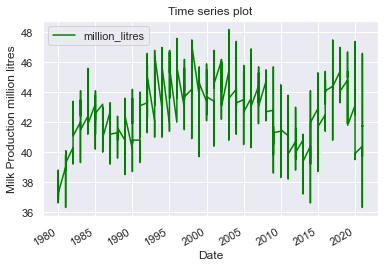

In [31]:
#Time series plot

df.plot(color = 'green')
plt.ylabel('Milk Production million litres')
plt.title('Time series plot')
plt.show()

Above we plot the milk production in a simple graph. It looks like there is some differential thought each year, we will investigate this further by separating it out by year.

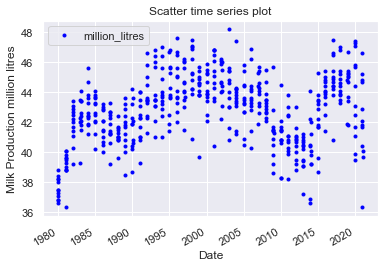

In [32]:
df.plot(style = '.', color = 'blue')
plt.ylabel('Milk Production million litres')
plt.title('Scatter time series plot')
plt.savefig('Scatter.jpg')



In [33]:
groups = df.groupby(pd.Grouper(freq = 'A'))

In [34]:
groups

In [35]:
keys = groups.groups.keys()

In [36]:
keys

dict_keys([Timestamp('1980-12-31 00:00:00', freq='A-DEC'), Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC'), Timestamp('1991-12-31 00:00:00', freq='A-DEC'), Timestamp('1992-12-31 00:00:00', freq='A-DEC'), Timestamp('1993-12-31 00:00:00', freq='A-DEC'), Timestamp('1994-12-31 00:00:00', freq='A-DEC'), Timestamp('1995-12-31 00:00:00', freq='A-DEC'), Timestamp('1996-12-31 00:00:00', freq='A-DEC'), Timestamp('1997-12-31 00:00:00', freq='A-DEC'), Timestamp('1998-12-31 00:00:00', freq='A-DEC'), Timestamp('1999-12-31 00:00:00', freq='A-DEC'), Timestamp('2000-12-31 00:00:0

In [37]:
groups.get_group('1980-12-31')

,million_litres
Date,
1980-01-01,38.2
1980-01-02,36.6
1980-01-03,38.4
1980-01-04,36.8
1980-01-05,38.8
1980-01-06,37.5
1980-01-07,38.0
1980-01-08,38.2
1980-01-09,37.1


In [38]:
for key in keys:
    print(key)

1980-12-31 00:00:00
1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00
1991-12-31 00:00:00
1992-12-31 00:00:00
1993-12-31 00:00:00
1994-12-31 00:00:00
1995-12-31 00:00:00
1996-12-31 00:00:00
1997-12-31 00:00:00
1998-12-31 00:00:00
1999-12-31 00:00:00
2000-12-31 00:00:00
2001-12-31 00:00:00
2002-12-31 00:00:00
2003-12-31 00:00:00
2004-12-31 00:00:00
2005-12-31 00:00:00
2006-12-31 00:00:00
2007-12-31 00:00:00
2008-12-31 00:00:00
2009-12-31 00:00:00
2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00
2017-12-31 00:00:00
2018-12-31 00:00:00
2019-12-31 00:00:00
2020-12-31 00:00:00
2021-12-31 00:00:00


In [39]:
key

Timestamp('2021-12-31 00:00:00', freq='A-DEC')

In [40]:
groups.get_group(key)['million_litres'].values

array([40.4, 36.3, 42.1, 42.9, 46.6, 44.7, 45.2, 44.8, 41.7, 41.8, 40.1,
       39.7])

In [41]:
years = pd.DataFrame()
for key in keys:
    years[key] = groups.get_group(key)['million_litres'].values

In [42]:
years

,1980-12-31,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,...,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,38.2,39.0,40.3,42.0,42.4,43.2,43.2,42.7,41.3,40.8,...,40.7,40.8,40.4,42.9,42.5,44.4,45.4,44.8,43.1,40.4
1,36.6,36.3,39.2,39.3,41.2,40.2,40.0,39.2,39.6,38.5,...,38.8,37.2,36.6,38.7,41.4,40.8,43.3,41.9,42.5,36.3
2,38.4,39.8,43.4,43.5,45.6,43.6,42.8,43.3,42.4,43.2,...,43.0,41.2,44.1,45.3,43.9,46.5,46.8,46.7,45.8,42.1
3,36.8,39.6,42.5,42.3,41.8,42.0,42.1,41.3,40.8,40.4,...,39.2,40.2,36.9,39.6,43.7,43.8,44.4,45.2,47.1,42.9
4,38.8,39.5,43.1,43.4,44.7,43.8,42.9,42.5,41.7,41.8,...,41.1,41.0,42.2,43.8,45.4,46.6,47.0,45.3,47.3,46.6
5,37.5,38.8,41.4,42.4,42.6,42.1,40.5,41.2,40.8,42.9,...,40.8,39.1,40.5,41.7,43.2,47.5,43.9,45.0,45.7,44.7
6,38.0,40.1,42.7,44.1,43.3,43.7,42.1,42.7,41.0,41.7,...,40.4,39.5,39.8,43.2,44.7,44.9,43.5,44.7,47.4,45.2
7,38.2,40.1,41.7,43.4,43.6,43.3,41.4,41.9,40.9,42.0,...,41.6,40.7,39.2,43.5,45.0,45.4,44.9,45.1,44.4,44.8
8,37.1,39.6,42.2,42.1,42.3,41.2,41.5,41.4,41.5,43.6,...,39.5,39.1,39.2,42.2,44.4,44.7,43.8,43.4,41.7,41.7
9,37.5,38.8,42.9,42.6,43.8,44.1,43.0,42.3,41.0,41.2,...,41.0,40.4,40.1,43.4,44.8,45.0,45.2,45.4,41.1,41.8


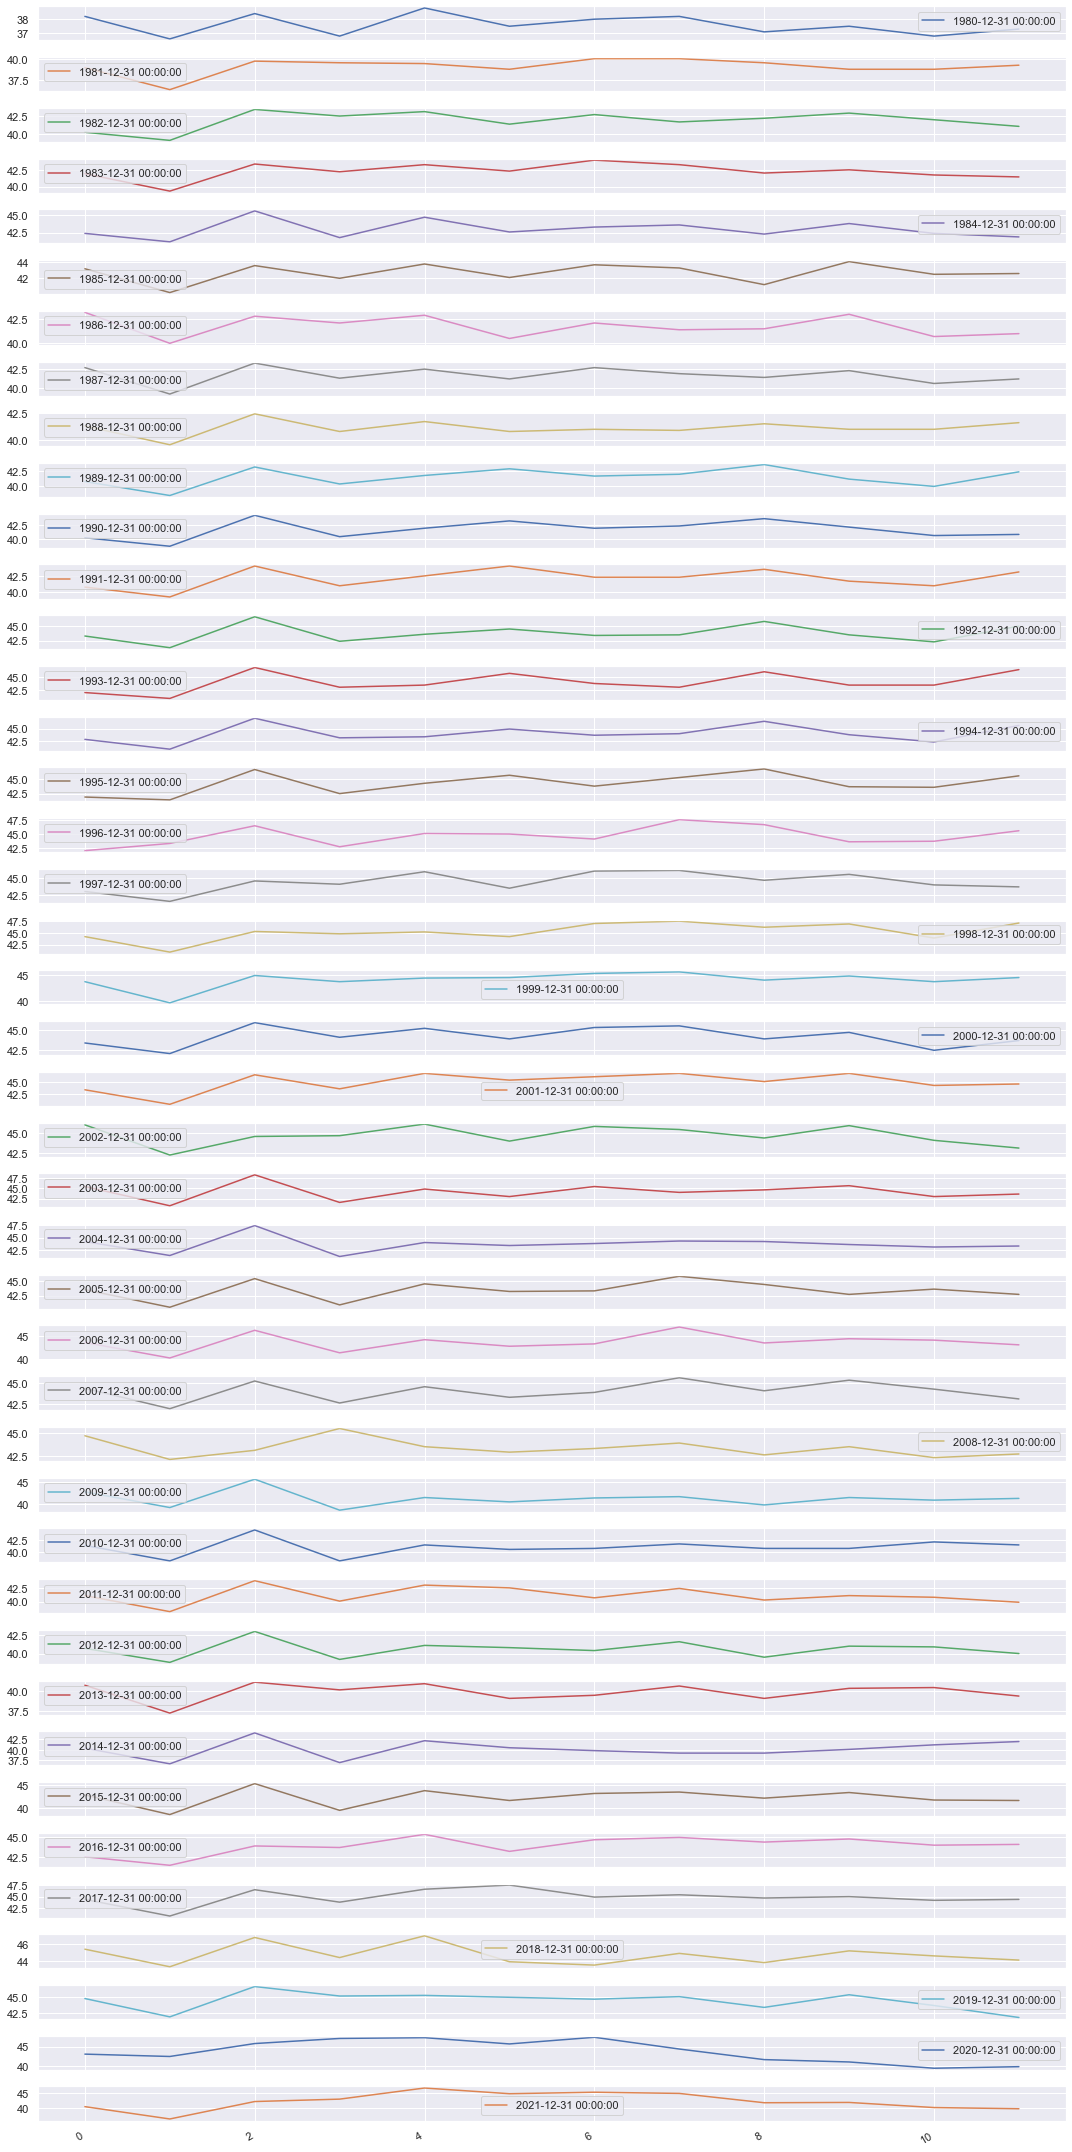

In [43]:
years.plot(subplots = True, figsize = (15, 30))
plt.savefig('Series.pdf')
plt.tight_layout()


We can see differences in milk sales throughout the year. Month 1, January shows the lowest value. A consistent pattern is noted year to year. This is because milk production in Ireland is seasonal, with the trough being Jan and peak being the summer. This is in contrast with most other countries and the reason why New Zealand was selected as a comparison. Although not a member of CAP, New Zealand is a country of similar population, with similar dependence on agriculture, a similar reputation internationally for dairy products and infant formula, and also a country that like Ireland, has a seasonal dairy industry.

# Manufacture Milk Price Ireland, NZ, Netherlands

Below, we read in a different dataset with annual manufactured milk prices for Ireland, New Zealand, and the Netherlands.

In [44]:
fao = pd.read_csv('FAOSTAT_data_en_1-4-2023 (2).csv')

In [45]:
fao.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,LCU,184.0,A,Official figure
1,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,LCU,199.0,A,Official figure
2,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1993,1993,7021,Annual value,LCU,214.0,A,Official figure
3,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1994,1994,7021,Annual value,LCU,213.0,A,Official figure
4,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1995,1995,7021,Annual value,LCU,226.0,A,Official figure


In [46]:
fao.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
490,PP,Producer Prices,554,NewZealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2017,2017,7021,Annual value,NaN,110.64,I,Imputed value
491,PP,Producer Prices,554,NewZealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2018,2018,7021,Annual value,NaN,120.71,I,Imputed value
492,PP,Producer Prices,554,NewZealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2019,2019,7021,Annual value,NaN,114.42,I,Imputed value
493,PP,Producer Prices,554,NewZealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2020,2020,7021,Annual value,NaN,123.44,I,Imputed value
494,PP,Producer Prices,554,NewZealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2021,2021,7021,Annual value,NaN,132.47,I,Imputed value


In [47]:
fao.shape

(495, 16)

In [48]:
fao.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Months Code', 'Months', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [49]:
fao.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Months Code           int64
Months               object
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [50]:
fao['Element'].unique()

array(['Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)',
       'Producer Price Index (2014-2016 = 100)'], dtype=object)

Lets keep Producer price in USD/tonne and remove the other options from the dataframe

In [51]:
fao = fao[fao.Element == 'Producer Price (USD/tonne)']

In [52]:
fao.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
60,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,USD,296.1,A,Official figure
61,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,USD,338.6,A,Official figure


In [53]:
fao.reset_index(drop=True)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,USD,296.1,A,Official figure
1,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,USD,338.6,A,Official figure
2,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1993,1993,7021,Annual value,USD,316.0,A,Official figure
3,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1994,1994,7021,Annual value,USD,318.6,A,Official figure
4,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1995,1995,7021,Annual value,USD,362.3,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,PP,Producer Prices,554,NewZealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2016,2016,7021,Annual value,USD,244.3,A,Official figure
86,PP,Producer Prices,554,NewZealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2017,2017,7021,Annual value,USD,374.4,A,Official figure
87,PP,Producer Prices,554,NewZealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2018,2018,7021,Annual value,USD,397.9,A,Official figure
88,PP,Producer Prices,554,NewZealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2019,2019,7021,Annual value,USD,359.1,A,Official figure


In [54]:
fao.shape

(90, 16)

In [55]:
fao.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element', 'Item Code (CPC)', 'Year Code', 'Months Code', 'Months', 'Unit', 'Flag', 'Flag Description'], axis =1, inplace=True)
fao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 60 to 463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    90 non-null     object 
 1   Item    90 non-null     object 
 2   Year    90 non-null     int64  
 3   Value   90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [56]:
fao.describe()

,Year,Value
count,90.000000,90.000000
mean,2005.500000,335.350000
std,8.703932,97.926804
min,1991.000000,113.100000
25%,1998.000000,277.325000
50%,2005.500000,352.500000
75%,2013.000000,399.250000
max,2020.000000,577.400000


In [57]:
fao.mean()

Year     2005.50
Value     335.35
dtype: float64

In [58]:
fao.median()

Year     2005.5
Value     352.5
dtype: float64

In [59]:
group_by = fao.groupby('Area')['Value'].sum()
print(group_by)

Area
Ireland        10302.0
Netherlands    11671.1
NewZealand      8208.4
Name: Value, dtype: float64


In [60]:
group_by = fao.groupby('Area')['Value'].mean()
print(group_by)

Area
Ireland        343.400000
Netherlands    389.036667
NewZealand     273.613333
Name: Value, dtype: float64


We perform the same steps on this dataset as the one above. Again, we focus on just data 'Producer Price (USD/tonne)', removing the other options such as producer price index.

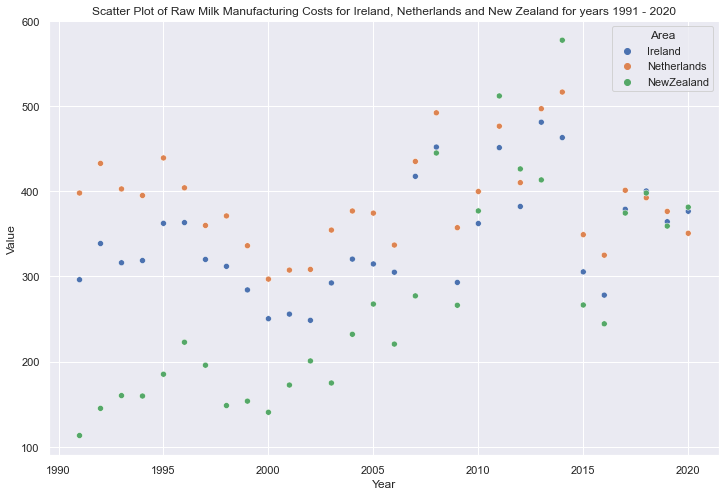

In [61]:
plt.figure(figsize=(12,8))
a1=sns.scatterplot(x='Year',
                y='Value',
                hue='Area',
                data=fao);
a1.set(title="Scatter Plot of Raw Milk Manufacturing Costs for Ireland, Netherlands and New Zealand for years 1991 - 2020");

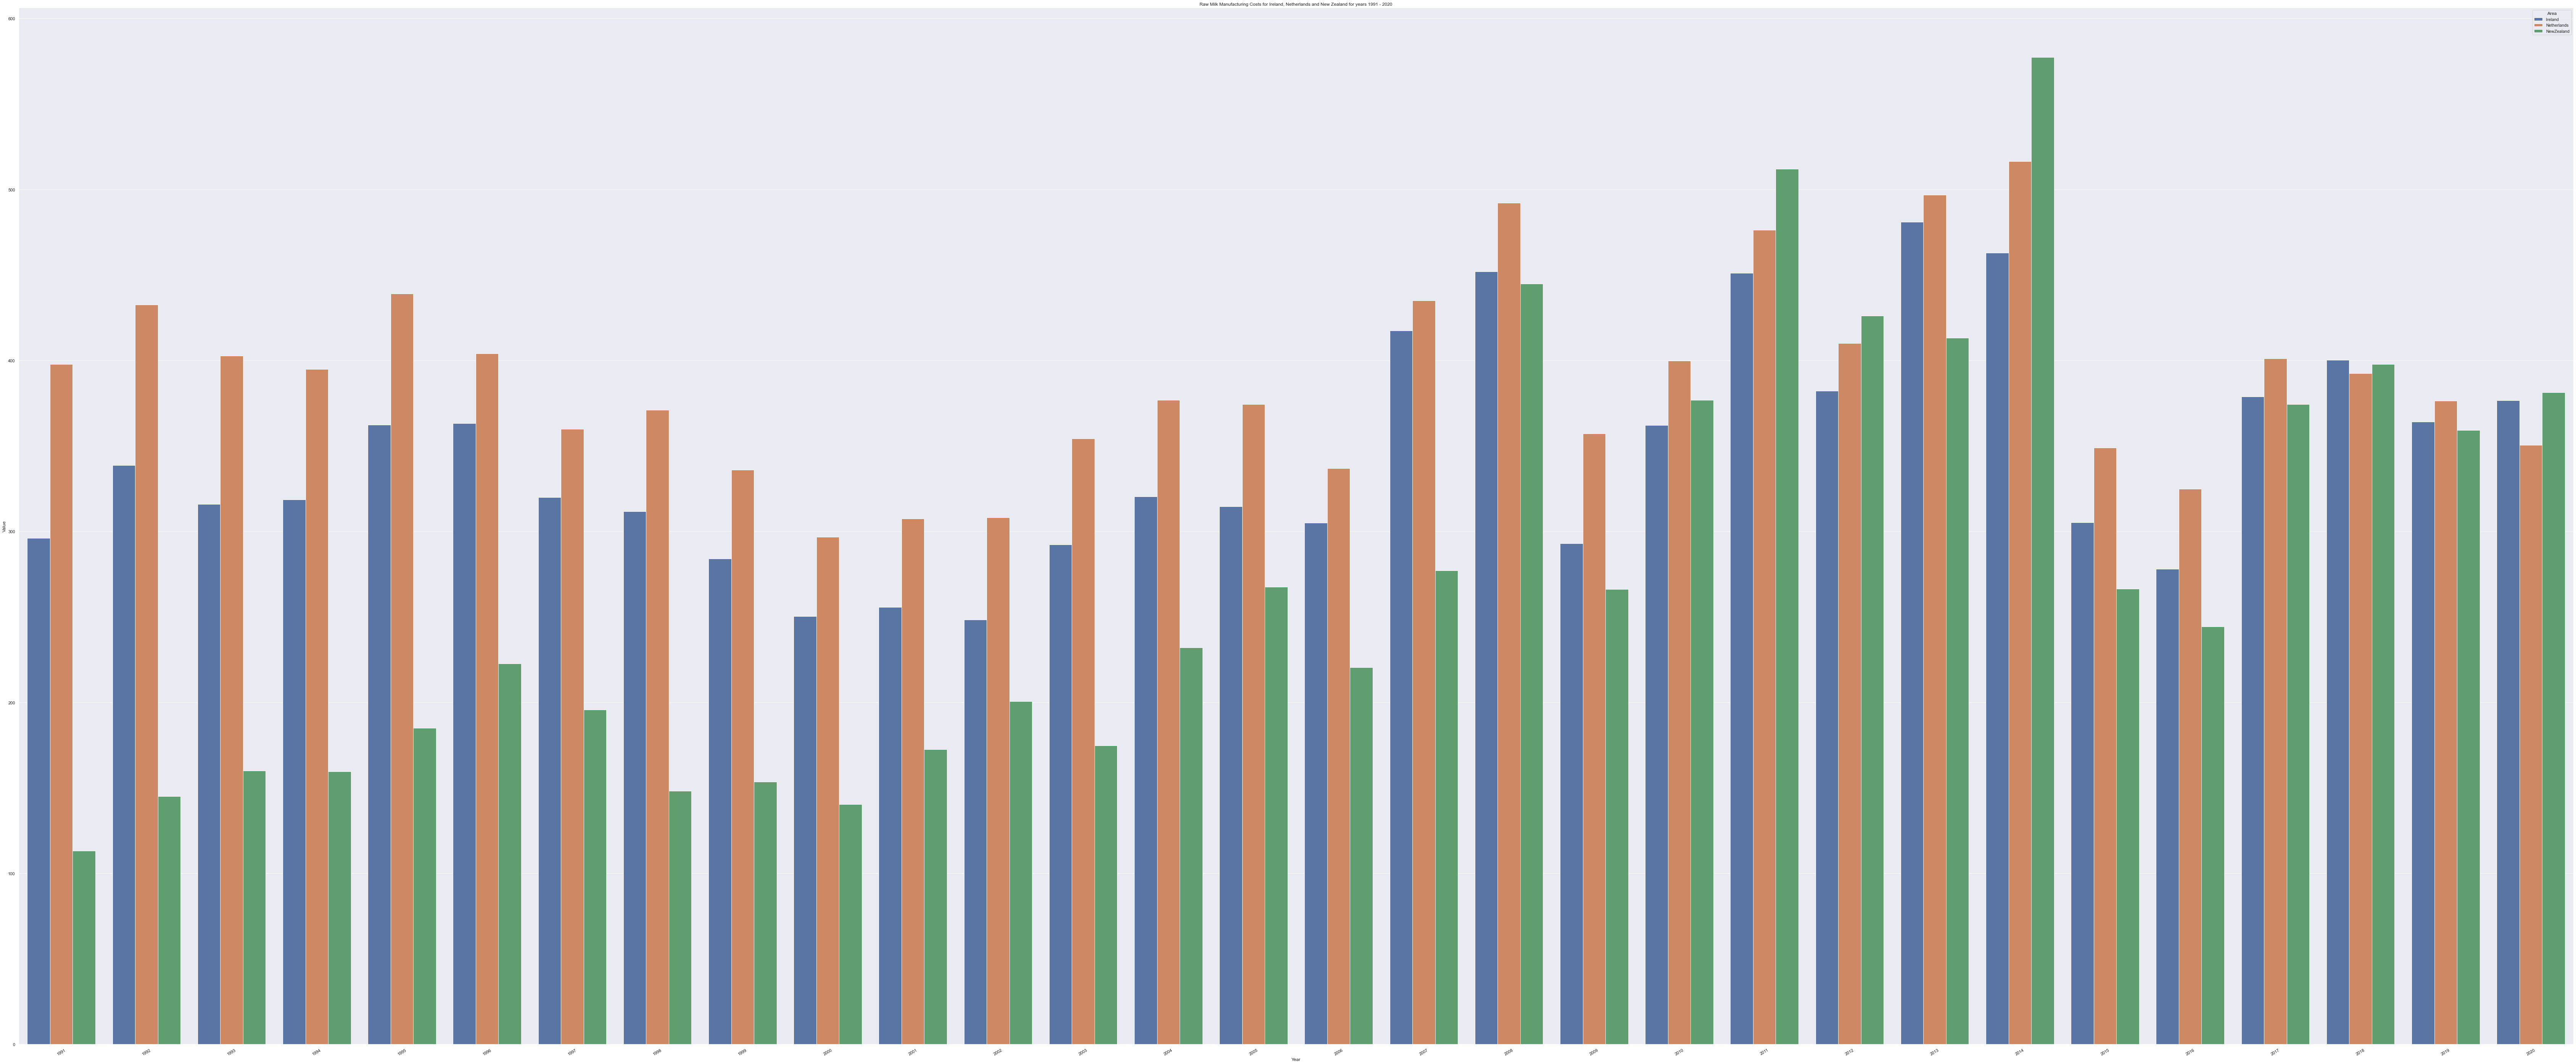

In [62]:
plt.figure(figsize=(120,50))
plt.xticks(rotation=30)
mf=sns.barplot(x="Year", y="Value", data=fao, hue='Area');
mf.set(title="Raw Milk Manufacturing Costs for Ireland, Netherlands and New Zealand for years 1991 - 2020");

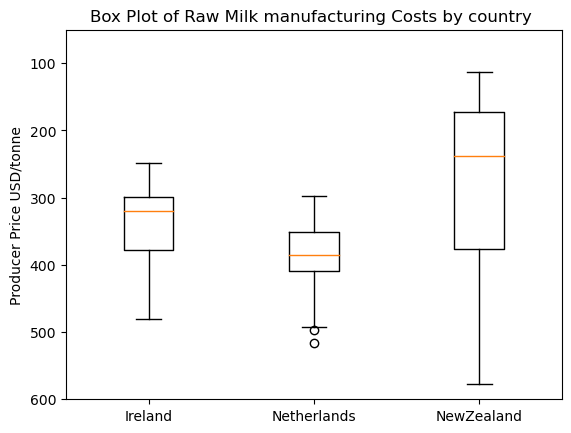

In [63]:
plt.style.use('default')

Ireland = fao.loc[fao.Area =='Ireland']['Value']
Netherlands = fao.loc[fao.Area =='Netherlands']['Value']
NewZealand = fao.loc[fao.Area =='NewZealand']['Value']


labels = ['Ireland', 'Netherlands', 'NewZealand']

plt.boxplot([Ireland, Netherlands, NewZealand], labels=labels)

plt.title('Box Plot of Raw Milk manufacturing Costs by country ')
plt.ylabel('Producer Price USD/tonne')
plt.ylim(600, 50);

plt.show()

### T-Test, two populations

A Teagasc advisor wants to know if, in average, there are differences between the Raw Milk manufacturing costs of Ireland compared with Netherlands and at a 5% significante level.

In [64]:
#We group the data according to country

Ireland = fao.query('Area == "Ireland"')['Value']
Netherlands = fao.query('Area == "Netherlands"')['Value']

In [65]:
#We perform the test assuming as H0 that mu1 = mu2 (Ireland = Netherlands)
test = stats.ttest_ind(Ireland, Netherlands, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=-2.93152991249736, pvalue=0.004819801913466071)

We can conclude there is a statistically significant difference between the milk manufacturing costs between Ireland and Netherlands.

In [66]:
test = stats.ttest_ind(Ireland, Netherlands, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=-2.93152991249736, pvalue=0.0048443664228533835)

### ANOVA_oneway

In [67]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

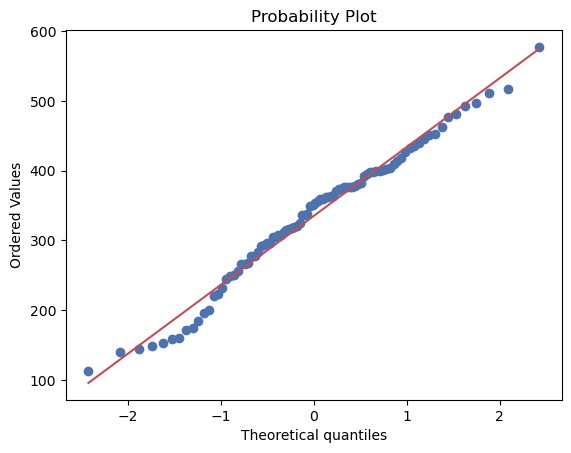

<Figure size 640x480 with 0 Axes>

In [68]:
#Normality plot. Our variable is "Value"

stats.probplot(fao.Value, plot=plt)
plt.figure();

In [69]:
#Shapiro wilk test

stats.shapiro(fao.Value[fao.Area == "Ireland"])

ShapiroResult(statistic=0.9427772164344788, pvalue=0.10806580632925034)

In [70]:
#Shapiro wilk test

stats.shapiro(fao.Value[fao.Area == "Netherlands"])

ShapiroResult(statistic=0.9576072096824646, pvalue=0.26874232292175293)

In [71]:
#Shapiro wilk test

stats.shapiro(fao.Value[fao.Area == "NewZealand"])

ShapiroResult(statistic=0.9122666120529175, pvalue=0.01698114350438118)

In [72]:
fao['Area'].value_counts()

NewZealand     30
Netherlands    30
Ireland        30
Name: Area, dtype: int64

In [73]:
Irl = fao.Value[fao.Area == "Ireland"]

In [74]:
Net = fao.Value[fao.Area == "Netherlands"]

In [75]:
NZ = fao.Value[fao.Area == "NewZealand"]

In [76]:
sd1 = Irl.std()
sd1

63.944442480468396

In [77]:
sd2 = Net.std()
sd2

56.40517513144689

In [78]:
sd3 = NZ.std()
sd3

123.15993452119227

In [79]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene


In [80]:
levene(Irl, Net, NZ, center = 'mean')

LeveneResult(statistic=13.017793689340754, pvalue=1.1329910731839064e-05)

In [81]:
#ONE-WAY ANOVA
model = ols('Value~Area', data = fao).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df         sum_sq        mean_sq          F    PR(>F)
Area       2.0  202754.300667  101377.150333  13.553817  0.000008
Residual  87.0  650725.344333    7479.601659        NaN       NaN


# Interactive Dashboard

In [82]:
#!pip install pywedge

In [102]:
import pywedge as pw

mc = pw.Pywedge_Charts(fao, c=None, y = 'Area')

In [84]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')